In [ ]:
#Project Instructions (from the Citi PowerPoint on Google Classroom):

#Step 1: Text preparation – Clean data/word embedding (Week 2 of Program)
#Outlier removals, text processing steps (stemming/lemmatization, lower case conversion,
#Tokenization, Stop words Removal), and word embedding.

#Step 2: Topic classification (Week 3 of Program)
#Clustering the tweets to identify groups and relationships between topics
#(space-time dependencies), visualization (important).

#Step 3: Topic Sentiment Score (Week 4 (final week) of Program)
#Topics scores quantification (positive, negative, or neutral).
#Analyze score change over time (compared to competitors).

#Step 4: Business insights (Week 4 (final week) of Program)
#Provide a summary of specific insights that can trigger actions to improve customer satisfaction.
#Create a PowerPoint presentation to do so.

In [ ]:
%pip install gensim #Installs gensim library...
#Gensim is a popular, open-source Python library specifically
#designed for unsupervised topic modeling and natural language processing (NLP).

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfre

In [ ]:
%pip install pyLDAvis #Installs pyLDAvis
#pyLDAvis is a Python library used for visualizing topic models, particularly those generated by Latent Dirichlet Allocation (LDA).
#It provides an interactive web-based interface to explore and understand the relationships between topics and their associated keywords.
#The visualization helps users interpret the topics in a topic model by displaying a 2D distance map, word clouds, and other relevant
#information.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.3 MB/s eta 0:00:00


In [ ]:
%pip install vaderSentiment #Installs vaderSentiment library
#VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis
#tool specifically designed for social media text, but also effective on other domains. It is implemented
#as a Python library, vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
%pip matplotlib inline #tells Jupyter to display plots (graphs, charts) directly below the code cell that produces them, instead of in a separate window.
import pandas as pd
import re, string
#The re module allows you to work with regular expressions, which are powerful tools for pattern matching and string manipulation.
#The string module provides useful constants and classes for string operations.
from bs4 import BeautifulSoup
#BeautifulSoup from the bs4 module is used for parsing and extracting data from HTML or XML content.
import numpy as np
import gensim
from gensim import corpora
from gensim import models
from gensim.models import TfidfModel
import nltk #nltk (natural language toolkit) is a powerful library for working with human language data in Python.
#used for Tokenization: Split text into words or sentences, Stopwords Removal: Remove common words like “the”, “is”, etc.
#Stemming / Lemmatization: Reduce words to their base/root form, Part-of-speech tagging: Identify nouns, verbs, etc.
from nltk.corpus import names, stopwords, words
import pprint #Pretty Print formats data structures like lists, dictionaries, and nested objects in a readable, indented way.

from nltk.tokenize import word_tokenize
nltk.download("all")
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF (Term Frequency–Inverse Document Frequency) from scikit-learn is a widely used method
#for converting text into numeric features for machine learning.
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import wordcloud #module used to visualize the most frequent words in a body of text.
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

ERROR: unknown command "matplotlib"


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
#This function reads data from a public Google Drive file.
def read_data(url):
  file_id = url.split('/')[-2] #url.split('/') breaks the URL into parts separated by /
  #[???] should grab the second-to-last part, which is the file ID.
  #Example:
  #url = 'https://drive.google.com/file/d/1A2B3C4D5E6F7G8H9I0J/view?usp=sharing'
  #url.split('/') → ['https:', '', 'drive.google.com', 'file', 'd', '1A2B3C4D5E6F7G8H9I0J', 'view?usp=sharing']
  #file_id = '1A2B3C4D5E6F7G8H9I0J'
  dwn_url = 'https://drive.google.com/uc?id=' + file_id #Constructs a direct download URL for the file.
  data = pd.read_csv(dwn_url)
  return data

#Q: Why can't we use the original link (the ones in the next cell)? Why do we need to create a function?
#A: The Google Drive share link (the ones below) aren't direct links to the file contents — it points to a webpage, not the raw file.
#The read_data function bypasses the web preview and points directly to the raw file content.

In [ ]:
am_ex = read_data('https://drive.google.com/file/d/1-Ea2lwnxE_vwCc4GdxV0v8T6tIVrQ5H_/view?usp=sharing')
bank_of_america = read_data('https://drive.google.com/file/d/1-DJdvDZjE1iI6C9aeN3607Xvwb20u6fi/view?usp=sharing')
capital_one = read_data('https://drive.google.com/file/d/1-Ca7mcZhpkB-PvGeCS9IebkmeVXTI7aY/view?usp=sharing')
chase = read_data('https://drive.google.com/file/d/1-CKc9GgpmabXKcUN4nTxvqZ6Ed7olDdN/view?usp=sharing')
citi = read_data('https://drive.google.com/file/d/1KKhtmJnqIByY3hEKp1YGupO5NvhZVnsc/view?usp=sharing')
wells_fargo = read_data('https://drive.google.com/file/d/1-6SrFcQ7muc1fgkzFnO7DDh7td_pMYW5/view?usp=sharing')

In [ ]:
print(am_ex.shape)
print(bank_of_america.shape)
print(capital_one.shape)
print(chase.shape)
print(citi.shape) #267,833 rows by 6 columns initially (same after dropping duplicates and null values)
print(wells_fargo.shape)

(107472, 7)
(132547, 7)
(252797, 7)
(161357, 7)
(267833, 6)
(155238, 7)


Text Preparation

In [ ]:
#Removes duplicate rows from the DataFrame, based only on the Tweet column.
#Keeps the first occurrence of each duplicate tweet; drops the others.
#Returns a new DataFrame; does not modify citi itself.
#Keeps the original row indexes in the returned DataFrame.
citi.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
citi.dropna(subset='Tweet') #Exercise: What does this line do? (This was used in the loan default project.)
#Answer: Drops all rows with null values with respect to the Tweet column only.

,Tweet ID,URL,Timestamp,Username,User Bio,Tweet
0,1.662154e+18,https://twitter.com/AskCiti/status/16621536780...,"May 26, 2023 · 5:48 PM UTC",@AskCiti,Ask Citi,"Hi Nelson, we haven't heard back and want to e..."
1,1.662153e+18,https://twitter.com/AskCiti/status/16621533427...,"May 26, 2023 · 5:46 PM UTC",@AskCiti,Ask Citi,Hello! Thank you for raising this concern abou...
2,1.662140e+18,https://twitter.com/AskCiti/status/16621400089...,"May 26, 2023 · 4:53 PM UTC",@AskCiti,Ask Citi,Hello and welcome to Citibank U.S. This does n...
3,1.662138e+18,https://twitter.com/AskCiti/status/16621379521...,"May 26, 2023 · 4:45 PM UTC",@AskCiti,Ask Citi,"The password requirements indicated ""No digita..."
4,1.662136e+18,https://twitter.com/AskCiti/status/16621360621...,"May 26, 2023 · 4:38 PM UTC",@AskCiti,Ask Citi,Hello and welcome to Citibank U.S. We would li...
...,...,...,...,...,...,...
267828,3.351073e+17,https://twitter.com/AskCiti/status/33510730248...,"May 16, 2013 · 6:59 PM UTC",@AskCiti,Ask Citi,@jahson30 Thanks for your patience. To better ...
267829,3.351015e+17,https://twitter.com/AskCiti/status/33510152635...,"May 16, 2013 · 6:36 PM UTC",@AskCiti,Ask Citi,@jahson30 Great question! Let me check into th...
267830,3.350994e+17,https://twitter.com/AskCiti/status/33509939237...,"May 16, 2013 · 6:28 PM UTC",@AskCiti,Ask Citi,@mariel_enriquez Your tweet concerns me. So we...
267831,3.350961e+17,https://twitter.com/AskCiti/status/33509610285...,"May 16, 2013 · 6:15 PM UTC",@AskCiti,Ask Citi,@1songglory To better assist you can you pleas...


In [ ]:
capital_one.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
capital_one.dropna(subset='Tweet')

,Unnamed: 0,Tweet ID,URL,Timestamp,Username,User Bio,Tweet
0,0,1662569348362371075,https://twitter.com/AskCapitalOne/status/16625...,"May 27, 2023 · 9:19 PM UTC",@AskCapitalOne,Capital One,"Thanks, Jeff. You as well! ^MC"
1,1,1662559135705989120,https://twitter.com/AskCapitalOne/status/16625...,"May 27, 2023 · 8:39 PM UTC",@AskCapitalOne,Capital One,Hi there. Thanks for reaching out! Can you ple...
2,2,1662559025500758016,https://twitter.com/AskCapitalOne/status/16625...,"May 27, 2023 · 8:38 PM UTC",@AskCapitalOne,Capital One,"Yes, the payment should qualify in this case i..."
3,3,1662536842040729602,https://twitter.com/AskCapitalOne/status/16625...,"May 27, 2023 · 7:10 PM UTC",@AskCapitalOne,Capital One,"as purchases, they would count toward the bonu..."
4,4,1662536818590449665,https://twitter.com/AskCapitalOne/status/16625...,"May 27, 2023 · 7:10 PM UTC",@AskCapitalOne,Capital One,"We're sorry for the confusion, Jeff. We unders..."
...,...,...,...,...,...,...,...
252792,252792,653563021286113280,https://twitter.com/AskCapitalOne/status/65356...,"Oct 12, 2015 · 1:29 PM UTC",@AskCapitalOne,Capital One,@Meterman145 DM us so we may gather more info ...
252793,252793,653562758718427136,https://twitter.com/AskCapitalOne/status/65356...,"Oct 12, 2015 · 1:27 PM UTC",@AskCapitalOne,Capital One,@JSBTOO Hello again! Great to hear from you. N...
252794,252794,653561407632445440,https://twitter.com/AskCapitalOne/status/65356...,"Oct 12, 2015 · 1:22 PM UTC",@AskCapitalOne,Capital One,@manoj007cs Thanks for the DM. Please Follow u...
252795,252795,653561135640248320,https://twitter.com/AskCapitalOne/status/65356...,"Oct 12, 2015 · 1:21 PM UTC",@AskCapitalOne,Capital One,"@IWanaBIncognito If something's wrong, we want..."


In [ ]:
am_ex.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
am_ex.dropna(subset='Tweet')

,Unnamed: 0,Tweet ID,URL,Timestamp,Username,User Bio,Tweet
0,0,1662574105533530116,https://twitter.com/AskAmex/status/16625741055...,"May 27, 2023 · 9:38 PM UTC",@AskAmex,Ask Amex,"Hi there, never heard back from you. Let me kn..."
1,1,1662567329794801664,https://twitter.com/AskAmex/status/16625673297...,"May 27, 2023 · 9:11 PM UTC",@AskAmex,Ask Amex,"Hi Ed, sorry about your loss. You may contact ..."
2,2,1662566175153217539,https://twitter.com/AskAmex/status/16625661751...,"May 27, 2023 · 9:07 PM UTC",@AskAmex,Ask Amex,"Hi, thank you for bringing this to our attenti..."
3,3,1662555720682729472,https://twitter.com/AskAmex/status/16625557206...,"May 27, 2023 · 8:25 PM UTC",@AskAmex,Ask Amex,"Hi there, thank you for reaching out and sorry..."
4,4,1662542814805106689,https://twitter.com/AskAmex/status/16625428148...,"May 27, 2023 · 7:34 PM UTC",@AskAmex,Ask Amex,"Hi there, never heard back from you. Let me kn..."
...,...,...,...,...,...,...,...
107467,107467,1113081956915429376,https://twitter.com/AskAmex/status/11130819569...,"Apr 2, 2019 · 2:13 PM UTC",@AskAmex,Ask Amex,Thanks for the information you provided. Pleas...
107468,107468,1113079791517872128,https://twitter.com/AskAmex/status/11130797915...,"Apr 2, 2019 · 2:04 PM UTC",@AskAmex,Ask Amex,Hi there. Thanks for tweeting. Is this concern...
107469,107469,1113079524336513025,https://twitter.com/AskAmex/status/11130795243...,"Apr 2, 2019 · 2:03 PM UTC",@AskAmex,Ask Amex,Hello Peter. Interest on High Yield Savings Ac...
107470,107470,1113078363017613313,https://twitter.com/AskAmex/status/11130783630...,"Apr 2, 2019 · 1:58 PM UTC",@AskAmex,Ask Amex,Good Morning Amanda and sorry for the issues. ...


In [ ]:
chase.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
chase.dropna(subset='Tweet')

,Unnamed: 0,Tweet ID,URL,Timestamp,Username,User Bio,Tweet
0,0,1662556283914932224,https://twitter.com/ChaseSupport/status/166255...,"May 27, 2023 · 8:28 PM UTC",@ChaseSupport,Chase Support,"Hey, thanks for reaching out. We would be happ..."
1,1,1662549780877262848,https://twitter.com/ChaseSupport/status/166254...,"May 27, 2023 · 8:02 PM UTC",@ChaseSupport,Chase Support,"Hi! I'm sorry to hear about your experience, a..."
2,2,1662542219830591490,https://twitter.com/ChaseSupport/status/166254...,"May 27, 2023 · 7:32 PM UTC",@ChaseSupport,Chase Support,"Hi, I want to help with your experience, and I..."
3,3,1662540035684532226,https://twitter.com/ChaseSupport/status/166254...,"May 27, 2023 · 7:23 PM UTC",@ChaseSupport,Chase Support,Ritz-Carlton primary customers and authorized ...
4,4,1662527725653880834,https://twitter.com/ChaseSupport/status/166252...,"May 27, 2023 · 6:34 PM UTC",@ChaseSupport,Chase Support,We're so happy to hear this. Have a great week...
...,...,...,...,...,...,...,...
161352,161352,1027148667780820992,https://twitter.com/ChaseSupport/status/102714...,"Aug 8, 2018 · 11:05 AM UTC",@ChaseSupport,Chase Support,"Hello, we would like to know what caused you t..."
161353,161353,1027147415139364864,https://twitter.com/ChaseSupport/status/102714...,"Aug 8, 2018 · 11:00 AM UTC",@ChaseSupport,Chase Support,"Hi, the Trip Cancellation benefit has terms an..."
161354,161354,1027147414480846850,https://twitter.com/ChaseSupport/status/102714...,"Aug 8, 2018 · 11:00 AM UTC",@ChaseSupport,Chase Support,Welcome back to another exciting day of fantas...
161355,161355,1027147413159665664,https://twitter.com/ChaseSupport/status/102714...,"Aug 8, 2018 · 11:00 AM UTC",@ChaseSupport,Chase Support,Good morning. Your concern is important to us....


In [ ]:
wells_fargo.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
wells_fargo.dropna(subset='Tweet')

,Unnamed: 0,Tweet ID,URL,Timestamp,Username,User Bio,Tweet
0,0,1662495257236307968,https://twitter.com/Ask_WellsFargo/status/1662...,"May 27, 2023 · 4:25 PM UTC",@Ask_WellsFargo,Ask Wells Fargo,"Hi, I saw your tweet. Can we look into somethi..."
1,1,1662461365296979969,https://twitter.com/Ask_WellsFargo/status/1662...,"May 27, 2023 · 2:10 PM UTC",@Ask_WellsFargo,Ask Wells Fargo,If the account-owner can reach out to us throu...
2,2,1662308385033801728,https://twitter.com/Ask_WellsFargo/status/1662...,"May 27, 2023 · 4:02 AM UTC",@Ask_WellsFargo,Ask Wells Fargo,I noticed your tweet. Do you need assistance? ...
3,3,1662271291393441792,https://twitter.com/Ask_WellsFargo/status/1662...,"May 27, 2023 · 1:35 AM UTC",@Ask_WellsFargo,Ask Wells Fargo,I came across your tweet. Please try to delete...
4,4,1662246117508014083,https://twitter.com/Ask_WellsFargo/status/1662...,"May 26, 2023 · 11:55 PM UTC",@Ask_WellsFargo,Ask Wells Fargo,"Hello! In a DM, can you provide more informati..."
...,...,...,...,...,...,...,...
155233,155233,920091387319681029,https://twitter.com/Ask_WellsFargo/status/9200...,"Oct 17, 2017 · 12:57 AM UTC",@Ask_WellsFargo,Ask Wells Fargo,I want to address the issue & try to help. Ple...
155234,155234,920090989238411265,https://twitter.com/Ask_WellsFargo/status/9200...,"Oct 17, 2017 · 12:56 AM UTC",@Ask_WellsFargo,Ask Wells Fargo,I apologize for the experience. Let me know if...
155235,155235,920090843205300224,https://twitter.com/Ask_WellsFargo/status/9200...,"Oct 17, 2017 · 12:55 AM UTC",@Ask_WellsFargo,Ask Wells Fargo,I would like to look into your concern. Please...
155236,155236,920089204910149637,https://twitter.com/Ask_WellsFargo/status/9200...,"Oct 17, 2017 · 12:48 AM UTC",@Ask_WellsFargo,Ask Wells Fargo,"I'm sorry for the delay, Cierra. Did she get t..."


In [ ]:
#Complete for the Bank of America dataset
bank_of_america.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
bank_of_america.dropna(subset='Tweet')

,Unnamed: 0,Tweet ID,URL,Timestamp,Username,User Bio,Tweet
0,0,1662538931970224128,https://twitter.com/BofA_Help/status/166253893...,"May 27, 2023 · 7:19 PM UTC",@BofA_Help,Bank of America Help,Hello. We noticed you tagged us. If there is s...
1,1,1662537207809208320,https://twitter.com/BofA_Help/status/166253720...,"May 27, 2023 · 7:12 PM UTC",@BofA_Help,Bank of America Help,We noticed you tagged us and we'd like the opp...
2,2,1662533169722130432,https://twitter.com/BofA_Help/status/166253316...,"May 27, 2023 · 6:56 PM UTC",@BofA_Help,Bank of America Help,Hello. We noticed you tagged us. If there is s...
3,3,1662530496415387651,https://twitter.com/BofA_Help/status/166253049...,"May 27, 2023 · 6:45 PM UTC",@BofA_Help,Bank of America Help,If you change your mind and you'd like us to r...
4,4,1662516781251002368,https://twitter.com/BofA_Help/status/166251678...,"May 27, 2023 · 5:51 PM UTC",@BofA_Help,Bank of America Help,We offer our deepest condolences to you for yo...
...,...,...,...,...,...,...,...
132542,132542,1157348182310969344,https://twitter.com/BofA_Help/status/115734818...,"Aug 2, 2019 · 5:51 PM UTC",@BofA_Help,Bank of America Help,"Hi, we use many factors to determine if a hold..."
132543,132543,1157347426145112064,https://twitter.com/BofA_Help/status/115734742...,"Aug 2, 2019 · 5:48 PM UTC",@BofA_Help,Bank of America Help,"Hi, what happened? Anything I can do to help? ..."
132544,132544,1157347366141403138,https://twitter.com/BofA_Help/status/115734736...,"Aug 2, 2019 · 5:48 PM UTC",@BofA_Help,Bank of America Help,Hi. We are disappointed to see this and would ...
132545,132545,1157346941438533633,https://twitter.com/BofA_Help/status/115734694...,"Aug 2, 2019 · 5:46 PM UTC",@BofA_Help,Bank of America Help,"Hi, we apologize for the long wait times. Plea..."


Extra Analysis

In [ ]:
#Updated sentiment_scores function - essentially the same, just returns sentiment rather than printing it.
def sentiment_scores(Tweet):
    sentiment = ""
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(Tweet)
    if sentiment_dict['compound'] >= 0.05 :
      sentiment = "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
      sentiment = "Negative"
    else :
      sentiment = "Neutral"
    return sentiment

In [ ]:
#Create a function that keeps the numeric score (Extra Analysis)
???

In [ ]:
#Apply your function on the Tweet column to create a new column revealing the sentiment scores of all the tweets
??? #takes 45 min to an hour to run

In [ ]:
#Let's see what the max sentiment scores are and what the tweets say.
??? #Let's see what the dataset looks like now - show the first five rows

,Tweet ID,URL,Timestamp,Username,User Bio,Tweet,Sentiment Score
0,1.662154e+18,https://twitter.com/AskCiti/status/16621536780...,"May 26, 2023 · 5:48 PM UTC",@AskCiti,Ask Citi,"Hi Nelson, we haven't heard back and want to e...",0.8271
1,1.662153e+18,https://twitter.com/AskCiti/status/16621533427...,"May 26, 2023 · 5:46 PM UTC",@AskCiti,Ask Citi,Hello! Thank you for raising this concern abou...,0.2714
2,1.662140e+18,https://twitter.com/AskCiti/status/16621400089...,"May 26, 2023 · 4:53 PM UTC",@AskCiti,Ask Citi,Hello and welcome to Citibank U.S. This does n...,0.6994
3,1.662138e+18,https://twitter.com/AskCiti/status/16621379521...,"May 26, 2023 · 4:45 PM UTC",@AskCiti,Ask Citi,"The password requirements indicated ""No digita...",0.6249
4,1.662136e+18,https://twitter.com/AskCiti/status/16621360621...,"May 26, 2023 · 4:38 PM UTC",@AskCiti,Ask Citi,Hello and welcome to Citibank U.S. We would li...,0.7783


In [ ]:
??? #let's see a summary of the Sentiment Score values
# 	Sentiment Score
# count	267833.000000
# mean	0.545853
# std	0.348295
# min	-0.933700
# 25%	0.361200
# 50%	0.658800
# 75%	0.815800
# max	0.986100

,Sentiment Score
count,267833.000000
mean,0.545853
std,0.348295
min,-0.933700
25%,0.361200
50%,0.658800
75%,0.815800
max,0.986100


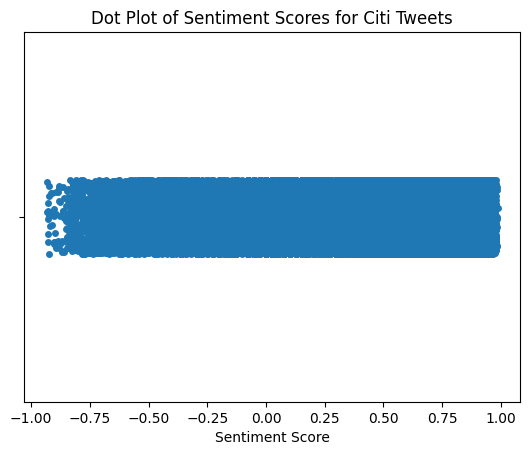

In [ ]:
import seaborn as sns
??? #create a dotplot of the sentiment scores to get a better sense of all the values (feel free to use Google/ChatGPT to see how to do this)

In [ ]:
#Find the five most positive tweets
pd.set_option('display.max_colwidth', None) #To show the entire tweet - without this, it gets cut off
??? # Full rows with top 5 scores

,Tweet ID,URL,Timestamp,Username,User Bio,Tweet,Sentiment Score
147601,9.670424e+17,https://twitter.com/AskCiti/status/967042384780562432,"Feb 23, 2018 · 2:24 PM UTC",@AskCiti,Ask Citi,"Hello Jack. That's a great question. I am happy to help. Yes, you can use your Shell credit card to buy Shell gift cards. Please let me know if you have any additional questions. We're here to help! We appreciate your business and hope you have a great weekend! ^Bee nitter.nl/messages/compose…",0.9861
143112,9.856882e+17,https://twitter.com/AskCiti/status/985688163292209159,"Apr 16, 2018 · 1:15 AM UTC",@AskCiti,Ask Citi,"Thank you for your reply. So glad to hear all is resolved! Feel free to reach out again with any future questions or concerns. We're here to help! I want you to know that your business is appreciated, and we wish you a wonderful night! Hope you had a fabulous vacation! ^Cynthia nitter.nl/messages/compose…",0.9844
149365,9.588554e+17,https://twitter.com/AskCiti/status/958855398169116674,"Feb 1, 2018 · 12:11 AM UTC",@AskCiti,Ask Citi,Thank you for your interest in applying for one of our credit cards. I would be happy to help. Please visit citi.us/1RKwxaI to review our card types and apply for the one that best fits your needs. Good luck and have a great night! ^Cynthia,0.9839
90102,1.227670e+18,https://twitter.com/AskCiti/status/1227669830762991617,"Feb 12, 2020 · 7:04 PM UTC",@AskCiti,Ask Citi,"Hello, I saw your tweet and am happy to help. Thank you for your interest in choosing Citi for your credit card needs. Currently, there is not an annual fee for the Citi Double Cash Card. I hope this information is helpful and wish you the best! Enjoy your day! ^Cynthia nitter.nl/messages/compose…",0.9832
136794,1.013026e+18,https://twitter.com/AskCiti/status/1013025541077774336,"Jun 30, 2018 · 11:44 AM UTC",@AskCiti,Ask Citi,"Maryrose is our Ace up our sleeve, she is great! Thank you for the kind words, it's our pleasure to assist you. If any other help is needed just send us a DM. Thank you for being a valued Citibank client. I hope you have a great day! ^Moe",0.9824


In [ ]:
#And the five most negative tweets for Citi
??? # Full rows with bottom 5 scores

,Tweet ID,URL,Timestamp,Username,User Bio,Tweet,Sentiment Score
22355,1.525954e+18,https://twitter.com/AskCiti/status/1525954284977901570,"May 15, 2022 · 9:40 PM UTC",@AskCiti,Ask Citi,"Kelly, have you contacted customer support to open a dispute or report fraud? You can do that online or through the mobile app. If the charges were in error a dispute can be opened, if the initial charge wasn't authorized it would be considered fraud. ^Mike",-0.9337
65369,1.321848e+18,https://twitter.com/AskCiti/status/1321847938654621697,"Oct 29, 2020 · 4:14 PM UTC",@AskCiti,Ask Citi,"Hi Sean, we regret any inconvenience. Did you submit a billing dispute or security close your account for fraud charges? Were you able to review the Dispute Center online for any communications about the dispute? Please DM details of the issue (no account numbers or PINs).^Jovit nitter.nl/messages/compose…",-0.9320
126699,1.060187e+18,https://twitter.com/AskCiti/status/1060186604202065921,"Nov 7, 2018 · 3:05 PM UTC",@AskCiti,Ask Citi,"Please note that we can no longer take action for you. The emails and correspondence you received are fraud and you must contact your local authorities. Citibank is not ""Citi Bank"" and there are many grammatical errors. We regret you have been a victim of fraud. ^Rita nitter.nl/messages/compose…",-0.9300
197103,7.512144e+17,https://twitter.com/AskCiti/status/751214442067664896,"Jul 8, 2016 · 12:40 AM UTC",@AskCiti,Ask Citi,I regret the frustration. Our team may block your card if they suspect fraud acct activity as a precaution. I can review your 1/2,-0.9300
147034,9.696689e+17,https://twitter.com/AskCiti/status/969668859778207744,"Mar 2, 2018 · 8:20 PM UTC",@AskCiti,Ask Citi,"Understood and I regret the frustration caused. Sometimes, depending on why the previous card was blocked, we would have to do the same to your user id for security purposes. For example if the card was stolen or if it was blocked due to fraud. ^Brian nitter.nl/messages/compose…",-0.9287


In [ ]:
#Now let's find the same for the other banks.
???